# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
#from api_keys import weather_api_key

weather_api_key = "ea545627dcb4a8ab4b6898efeecc1cb4"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


599

In [4]:
cities[:5]

['tuktoyaktuk', 'vostok', 'taolanaro', 'khonuu', 'thompson']

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:


api_key = "34e1b34fce8546f69cc981c026bb320c"
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "sauda"
# Build query URL
query_url = url + "appid=" + api_key + "&q="
response = requests.get(query_url).json()
response







{'coord': {'lon': 6.35, 'lat': 59.65},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 287.34,
  'feels_like': 281.82,
  'temp_min': 286.48,
  'temp_max': 288.15,
  'pressure': 995,
  'humidity': 83},
 'visibility': 10000,
 'wind': {'speed': 8.49, 'deg': 195, 'gust': 15.2},
 'clouds': {'all': 100},
 'dt': 1600813532,
 'sys': {'type': 3,
  'id': 2003794,
  'country': 'NO',
  'sunrise': 1600838518,
  'sunset': 1600882307},
 'timezone': 7200,
 'id': 3140056,
 'name': 'Sauda',
 'cod': 200}

In [12]:

units = "metric"

query_url = f"{url}appid={api_key}&units={units}&q="

city_list = []
lat = []
long = []
temperature = []
humidity = []
windspeed = []
cloudiness = []
country = []
date = []

for city in cities:
    
    try:
    
        response = requests.get(query_url + city).json()

        lat.append(response["coord"]["lat"])

        long.append(response["coord"]["lon"])

        temperature.append(response["main"]["temp_max"])

        humidity.append(response["main"]["humidity"])

        windspeed.append(response["wind"]["speed"])

        cloudiness.append(response["clouds"]["all"])

        country.append(response["sys"]["country"])

        date.append(response["dt"])

        city_list.append(city)
    
        print("City found: " + city)
    
    except:
        print("city not found")
        
        
        
      
        
        


City found: tuktoyaktuk
City found: vostok
city not found
city not found
City found: thompson
City found: atuona
City found: albany
City found: east london
City found: pec
City found: barrow
City found: punta arenas
city not found
City found: beloha
City found: saint george
City found: bosaso
City found: port alfred
City found: airai
City found: dikson
City found: yerbogachen
City found: puerto ayora
city not found
City found: mataura
City found: severo-kurilsk
City found: sorong
City found: alofi
City found: ushuaia
City found: saint-philippe
City found: sitka
City found: saldanha
City found: tura
City found: rikitea
City found: kopavogur
City found: sinnamary
City found: vaini
City found: carnarvon
City found: qaanaaq
City found: chiredzi
City found: avera
City found: kodiak
City found: ahipara
city not found
City found: evinayong
City found: lebu
City found: fairbanks
City found: naze
City found: hobart
City found: nyurba
City found: mount gambier
City found: port elizabeth
City fou

City found: gua musang
City found: elizabeth city
City found: nome
City found: kartaly
City found: jacareacanga
City found: bundibugyo
City found: vigrestad
City found: hami
City found: maldonado
City found: acapulco
City found: atar
City found: ekhabi
city not found
city not found
City found: saint-joseph
City found: gigmoto
City found: angol
City found: sabang
City found: antigonish
City found: blairmore
City found: maragogi
City found: bara
City found: vanavara
City found: lasa
City found: monsenhor gil
City found: barra patuca
City found: charters towers
City found: paamiut
City found: caceres
City found: ocean springs
City found: zabid
City found: beringovskiy
City found: shenjiamen
City found: green valley
City found: ilula
City found: daru
City found: sur
City found: bilibino
city not found
City found: serenje
City found: kattivakkam
City found: karratha
city not found
City found: mananjary
City found: san quintin
City found: zhezkazgan
city not found
City found: nishihara
City 

In [20]:
cities_list = pd.DataFrame({"City Name": city_list, "latitude": lat,
                           "longitude": long, "temperature": temperature, 
                           "humidity": humidity, "windspeed": windspeed,
                           "cloudiness": cloudiness, "country": country,
                           "date": date})

cities_list

,City Name,latitude,longitude,temperature,humidity,windspeed,cloudiness,country,date
0,tuktoyaktuk,69.45,-133.04,5.00,80,2.10,90,CA,1600815249
1,vostok,46.49,135.88,8.64,92,1.17,95,RU,1600815249
2,thompson,55.74,-97.86,13.00,66,4.10,75,CA,1600815124
3,atuona,-9.80,-139.03,25.77,72,8.65,78,PF,1600815067
4,albany,42.60,-73.97,17.22,38,3.58,0,US,1600815093
...,...,...,...,...,...,...,...,...,...
548,manyoni,-5.75,34.84,17.15,67,2.23,4,TZ,1600815401
549,las cruces,32.31,-106.78,33.33,11,3.10,1,US,1600815302
550,boljevac,43.83,21.95,17.00,72,1.00,7,RS,1600815402
551,pimenta bueno,-11.67,-61.19,28.53,50,1.76,55,BR,1600815402


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
cities_list.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [24]:
plotting_data = pd.read_csv("cities.csv")
plotting_data.head()

,Unnamed: 0,City Name,latitude,longitude,temperature,humidity,windspeed,cloudiness,country,date
0,0,tuktoyaktuk,69.45,-133.04,5.00,80,2.10,90,CA,1600815249
1,1,vostok,46.49,135.88,8.64,92,1.17,95,RU,1600815249
2,2,thompson,55.74,-97.86,13.00,66,4.10,75,CA,1600815124
3,3,atuona,-9.80,-139.03,25.77,72,8.65,78,PF,1600815067
4,4,albany,42.60,-73.97,17.22,38,3.58,0,US,1600815093


#### Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

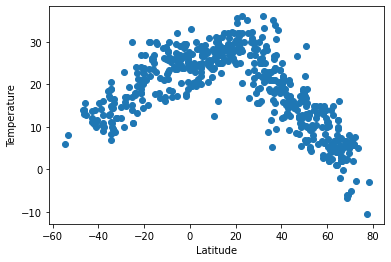

In [63]:

x1 = plotting_data['latitude']
y1 = plotting_data['temperature']
plt.scatter(x1, y1)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.savefig('Lat-v-Temp.png', dpi=300, bbox_inches='tight')
plt.show



The above plot shows how the temperature changes in locations as they move towards the equator from minus latitutde and then further away in positive latitudes

#### Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

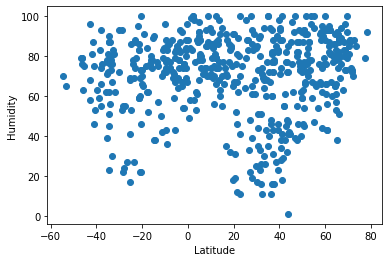

In [64]:
x2 = plotting_data['latitude']
y2 = plotting_data['humidity']
plt.scatter(x2, y2)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('Lat-v-Hum.png', dpi=300, bbox_inches='tight')
plt.show

The above plot shows how the level of humidity in locations as they move towards the equator from minus latitutde and then further away in positive latitudes

#### Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

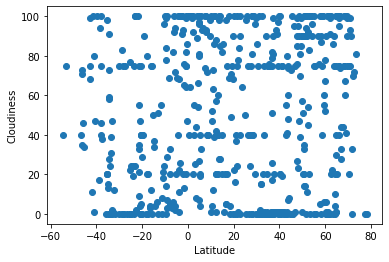

In [65]:
x3 = plotting_data['latitude']
y3 = plotting_data['cloudiness']
plt.scatter(x3, y3)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('Lat-v-Cld.png', dpi=300, bbox_inches='tight')
plt.show

The above plot shows how the level of cloudiness in locations as they move towards the equator from minus latitutde and then further away in positive latitudes

#### Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

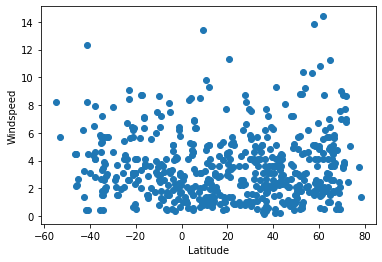

In [66]:
x4 = plotting_data['latitude']
y4 = plotting_data['windspeed']
plt.scatter(x4, y4)
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.savefig('Lat-v-WSpeed.png', dpi=300, bbox_inches='tight')
plt.show

The above plot shows how windspeed changes depending on location as they move towards the equator from minus latitutde and then further away in positive latitudes

## Linear Regression

In [37]:
# OPTIONAL: Create a function to create Linear Regression plots


In [38]:
# Create Northern and Southern Hemisphere DataFrames

# Northern Hemisphere:

Northern_H = plotting_data[plotting_data["latitude"] > 0]

Northern_H.head()

,Unnamed: 0,City Name,latitude,longitude,temperature,humidity,windspeed,cloudiness,country,date
0,0,tuktoyaktuk,69.45,-133.04,5.00,80,2.10,90,CA,1600815249
1,1,vostok,46.49,135.88,8.64,92,1.17,95,RU,1600815249
2,2,thompson,55.74,-97.86,13.00,66,4.10,75,CA,1600815124
4,4,albany,42.60,-73.97,17.22,38,3.58,0,US,1600815093
6,6,pec,42.66,20.29,13.00,82,1.50,40,XK,1600815307


In [39]:
# Southern Hemisphere:

Southern_H = plotting_data[plotting_data["latitude"] < 0]

Northern_H.head()

,Unnamed: 0,City Name,latitude,longitude,temperature,humidity,windspeed,cloudiness,country,date
0,0,tuktoyaktuk,69.45,-133.04,5.00,80,2.10,90,CA,1600815249
1,1,vostok,46.49,135.88,8.64,92,1.17,95,RU,1600815249
2,2,thompson,55.74,-97.86,13.00,66,4.10,75,CA,1600815124
4,4,albany,42.60,-73.97,17.22,38,3.58,0,US,1600815093
6,6,pec,42.66,20.29,13.00,82,1.50,40,XK,1600815307


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [41]:
x = Northern_H['temperature']
y = Northern_H['latitude']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
print("r-squared is:", rvalue**2)

r-squared is: 0.689205086070447


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [42]:
x = Southern_H['temperature']
y = Southern_H['latitude']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
print("r-squared is:", rvalue**2)

r-squared is: 0.6001191404523121


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [43]:
x = Northern_H['humidity']
y = Northern_H['latitude']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
print("r-squared is:", rvalue**2)

r-squared is: 0.0017376760204491192


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [44]:
x = Southern_H['humidity']
y = Southern_H['latitude']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
print("r-squared is:", rvalue**2)

r-squared is: 0.019548977027195887


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [45]:
x = Northern_H['cloudiness']
y = Northern_H['latitude']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
print("r-squared is:", rvalue**2)

r-squared is: 0.0010222789913331702


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [46]:
x = Southern_H['cloudiness']
y = Southern_H['latitude']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
print("r-squared is:", rvalue**2)

r-squared is: 0.014602963968422407


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [47]:
x = Northern_H['windspeed']
y = Northern_H['latitude']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
print("r-squared is:", rvalue**2)

r-squared is: 0.013920343425543122


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [48]:
x = Southern_H['windspeed']
y = Southern_H['latitude']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
print("r-squared is:", rvalue**2)

r-squared is: 0.024541932090184657
